In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate as interp
%matplotlib notebook

## Problem 1:

<font size="4">
a) 

We are allowed to compute 4 points: $f(x\pm \delta), f(x\pm 2 \delta)$.

These have the following Taylor expansions:

$ f(x+\delta) \approx f(x)+f'(x)\delta+\frac{1}{2}f''(x)\delta^2+\frac{1}{6}f'''(x)\delta^3+O(\delta^4) $
    
$ f(x-\delta) \approx f(x)-f'(x)\delta+\frac{1}{2}f''(x)\delta^2-\frac{1}{6}f'''(x)\delta^3+O(\delta^4) $
    
$ f(x+2\delta) \approx f(x)+f'(x)2\delta+\frac{1}{2}f''(x)(2\delta)^2+\frac{1}{6}f'''(x)(2\delta)^3+O((2\delta)^4) $
    
$ f(x-2\delta) \approx f(x)-f'(x)2\delta+\frac{1}{2}f''(x)(2\delta)^2-\frac{1}{6}f'''(x)(2\delta)^3+O((2\delta)^4) $

Hence, we can compute 2 centered derivatives:

$f'(x)\approx\frac{f(x+\delta)-f(x-\delta)}{2\delta}\approx f'(x)\delta+\frac{1}{6}f'''(x)\delta^2+O(\delta^4)$ (1)
    
$f'(x)\approx\frac{f(x+2\delta)-f(x-2\delta)}{4\delta}\approx f'(x)\delta+\frac{4}{6}f'''(x)\delta^2+O(\delta^4)$ (2)

If we subract 1/4 times (2) from (1), we can get rid of the 2nd order terms, which leaves

$\frac{3}{4}f'(x)+O(\delta^4)$, now multiply by 4/3 to get f'(x)

so $f'(x)\approx(\frac{f(x+\delta)-f(x-\delta)}{2\delta}-\frac{1}{4}\frac{f(x+2\delta)-f(x-2\delta)}{4\delta})\cdot \frac{4}{3}= \frac{8f(x+\delta)-8f(x-\delta)-f(x+2\delta)+f(x-2\delta)}{12\delta}$
    

b)
    
the roundoff error is $e_r \sim \epsilon|f(x)/delta|$ and the truncation error is now $e_t \sim |f^{(5)}(x)\delta^4|$
    
where $\epsilon$ is the fractional precision of the machine

so $\frac{d(e_r+e_t)}{d\delta} = -\frac{\epsilon f(x)}{\delta^2}+4f^{(5)}\delta^3$

we can set this equal to zero and solve for the optimal $\delta$, which gives $\delta \sim (\frac{\epsilon f(x)}{f^{(5)}(x)})^{\frac{1}{5}}$
    
for $f(x)=exp(x)$ and $f(x)=exp(0.01x)$, we then have optimal $\delta$ of $10^{-3}$ and $10^{-1}$, we can verify this with the following code
    
$ $    

In [18]:
logdelta = np.linspace(-14,0,1001) 
delta = 10**logdelta #create widely sampled delta array

#defining both functions

fun1 = np.exp 

def fun2(x):
    return np.exp(0.01*x)

def test_operator(x_0):
    fig, ax = plt.subplots(1,1)
    ax.set_xlabel(r'$\delta$', fontsize = 18)
    ax.set_ylabel('error', fontsize = 18)
    
    i = 0
    for fun in [fun1,fun2]:
        i+=1
        
        #evaluate all of the points to compute the derivative

        y1 = fun(x_0+delta)
        y2 = fun(x_0-delta)
        y3 = fun(x_0+2*delta)
        y4 = fun(x_0-2*delta)

        deriv = (8*y1-8*y2-y3+y4)/(12*delta) #compute derivative with estimate shown above

        truederiv = fun(x_0) #compute the real derivative
        if i == 2:
            truederiv*=0.01 #for f(x) = exp(0.01x), the derivative has a factor 0.01
        

        error = np.abs(deriv-truederiv)
        
        #plot error vs delta chosen

        ax.loglog(delta,error, label = str(fun), linewidth = 1)
    ax.legend(['exp(x)','exp(0.01x)'], fontsize = 16)

<IPython.core.display.Javascript object>


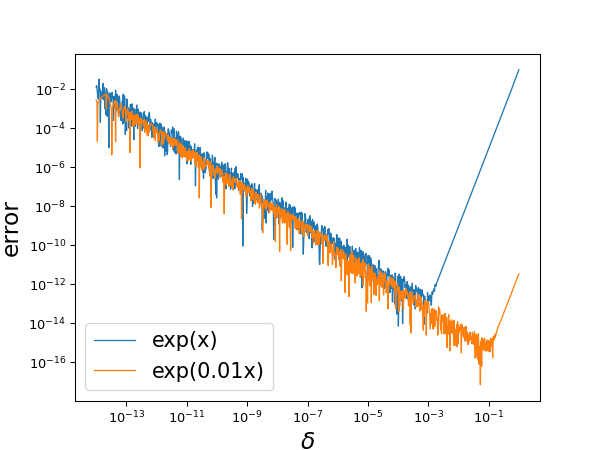

In [19]:
test_operator(x_0=1)

<font size="4"> We see that our estimates of the optimal $\delta$ were accurate

## Problem 2

In [52]:
def ndiff(fun,x,full=False):
    
    ef = 1e-16 #machine precision      
    
    dx = ef**(1/3)*x #from Numerical recipes
    
    #adding conditions for when x=0, for array and number
    
    try:
        if len(dx)!=0:
            dx[dx==0]=ef**(1/3)
    except:
        if x==0:
            dx=ef**(1/3)
            print('Using dx=ef**1/3\n')
            
    #function evaluations necessary
    
    y1 = fun(x+dx)
    y2 = fun(x-dx)
    deriv = (y1-y2)/(2*dx)
    
    error = np.abs(deriv*ef**(2/3))
    
    if full:
                
        try: #if x is an array, the returned error is the average of the error on each point
            if len(dx)!=0:
                error = np.mean(error)
        except:
            None
            
        print(r"Estimate f'(x) = {} with optimal dx = {} and estimate error {}". format(deriv,dx,error))
              
        return deriv,dx,error
    
    else:
        return deriv
    

<font size="4">
The differentiator computes the optimal dx based on the method we saw in class to determine it for the centered derivative. That optimal dx was $dx\approx (\frac{\epsilon f}{f'''})^{1/3} = \epsilon^{1/3}x_c$. For a lack of a better estimate, we can assume $x_c\sim x$ (Numerical recipes, 3rd ed, p.230), which gives us our optimal dx.
    
Then, the function computes the 2-sided derivative, and its estimate of the error. The absolute error is computed as $|f'(x)\epsilon_f|$, where $\epsilon_f$ is the fractional error $\epsilon_f\sim \epsilon^{2/3}$.
    
We can test the function below, with $f(x) = cos(x)$ and $f(x) = \frac{1}{1+x^2}$, and after, I test it with a gaussian to show it also works when x is an array.
    
$ $    
    

In [53]:
#testing ndiff with analytically known derivative: f(x) = cos(x)
fun = np.cos
x=0

results = ndiff(fun,x,True)
deriv_guess = results[0]
deriv_true = -np.sin(x)
error_true = np.abs(deriv_guess-deriv_true)

print('The true derivative is {}, the true error was {}'.format(deriv_true,error_true))

Using dx=ef**1/3

Estimate f'(x) = 0.0 with optimal dx = 4.641588833612782e-06 and estimate error 0.0
The true derivative is -0.0, the true error was 0.0


In [26]:
#testing ndiff with analytically known derivative: f(x) = 1/(1+x^2)
def lorentz(x):
    return 1/(x**2+1)


fun = lorentz
x=1
results = ndiff(fun,x,True)
deriv_guess = results[0]
deriv_true = -2*x*(1+x**2)**-2
error_true = np.abs(deriv_guess-deriv_true)

print('The true derivative is {}, the true error was {}'.format(deriv_true,error_true))

Estimate f'(x) = -0.4999999999888638 with optimal dx = 4.641588833612782e-06 and estimate error 1.0772173449919511e-11
The true derivative is -0.5, the true error was 1.1136203070805095e-11


<IPython.core.display.Javascript object>


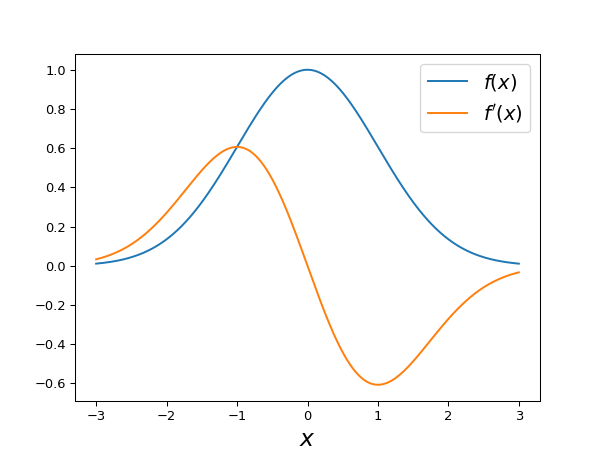

In [30]:
# testing ndiff with x as an array: f(x) = exp(-(1/2)*x^2)

def gauss(x):
    return np.exp(-0.5*x**2)


xs = np.linspace(-3,3,1001)
ys = gauss(xs)

deriv = ndiff(fun = gauss, x = xs)

fig, ax = plt.subplots(1,1)
ax.plot(xs,ys, label = '$f(x)$')
ax.plot(xs,deriv, label = "$f'(x)$")
ax.set_xlabel(r'$x$', fontsize = 18)

ax.legend(fontsize = 15)


<font size="4">It works, for evaluation of the derivative at $x=0$, I added a condition that $x_c$ just defaults to 1, for lack of a better estimate.
    
$ $    

## Problem 3

In [31]:
data = np.loadtxt('lakeshore.txt') #load data

In [39]:
def lakeshore(V, data):
    
    
    #order the data for the interpolation to work, also split in voltage/temp (x,y)
    
    V_data = np.flipud(data[:,1])
    T_data = np.flipud(data[:,0])
    
    try:
        if len(V)!=0:
            if np.min(V)<=V_data[0] or np.max(V)>=V_data[-1]:
                print('Voltage outside of range of data')
                return None
    except:
        if not V_data[0]<=V<=V_data[-1]:
            print('Voltage outside of range of data')
            return None

    #plot data
    
    fig, ax = plt.subplots(2,1, gridspec_kw={'height_ratios': [3, 1]})
    ax[0].plot(V_data, T_data, 'o', label = 'Data', markersize = 2)
    
    ax[1].set_xlabel('V')
    ax[0].set_ylabel('T')
    
    #interpolate using the cubic spline from scipy
    
    spline = interp.splrep(V_data,T_data, k=3)
    T_interp = interp.splev(V, spline)
    
    #compute residuals
    
    resids = interp.splev(V_data,spline)-T_data
    
    #compute an error estimate
    
    err_est = np.std(resids)
    
    plot_V = np.linspace(V_data[0],V_data[-1],1001)
    plot_T = interp.splev(plot_V, spline)
    
    ax[0].plot(plot_V,plot_T,linewidth = 1,label = 'Cubic Interpolation, error estimate {}'.format(round(err_est,14)))
    ax[0].plot(V,T_interp,'o', markersize = 6,color='red',markeredgewidth = 1, markeredgecolor = 'black', label = 'Interpolated points')
    ax[1].plot(V_data, resids,'o', markersize = 2,color = 'k')
    ax[1].set_ylabel('Residuals')
    ax[0].legend()
    ax[1].hlines(0,0,1.7,linestyle='--', color = 'grey', alpha = 0.5)
    
    return T_interp, err_est

<IPython.core.display.Javascript object>


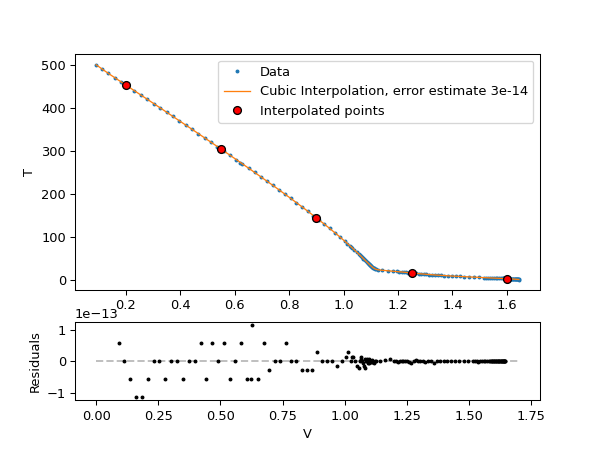

In [40]:
V_interp = np.linspace(0.2,1.6,5)
T_interp, error = lakeshore(V_interp,data)

<font size="4">The interpolator function works as it should. In this case, just so it pops on the graph, I have interpolated the data for 1000 points and plotted it inside of the function. When calling lakeshore, it plots the interpolated points on the graph as red dots. Below we see the residuals. The estimate of the error is computed from those residuals ($error \sim std(resids)) $. The function returns the interpolated value at an arbitrary voltage V, whether V is a single point or an array. ALso, if one or more of the points at which we ask the function to interpolate is outside of the range of the data, the function returns nothing and prints a message.
    
$ $

## Problem 4

<font size="4"> We first need to code each way to fit our data

In [44]:
#defining each function that is going to be used to perform each fit (Based on the code from the lectures)

#Polynomial Fit
def poly_eval(x_data,y_data,n,point):
    
    pp=np.polyfit(x_data,y_data,n)
    return np.polyval(pp,point)

#Rational Fit
def rat_return(p,q,x):

    
    top=0
    for i in range(len(p)):
        top=top+p[i]*x**i
    bot=1
    for i in range(len(q)):
        bot=bot+q[i]*x**(i+1)
    return top/bot

def rat_eval(x,y,n,m,point):
    
    assert(len(x)==n+m-1)
    assert(len(y)==len(x))
    mat=np.zeros([n+m-1,n+m-1])
    for i in range(n):
        mat[:,i]=x**i
    for i in range(1,m):
        mat[:,i-1+n]=-y*x**i
    pars=np.dot(np.linalg.inv(mat),y)
    p=pars[:n]
    q=pars[n:]

    return rat_return(p,q,point)

#rational fit, but using linalg.pinv instead of inv    
def rat_eval2(x,y,n,m,point):
    
    assert(len(x)==n+m-1)
    assert(len(y)==len(x))
    mat=np.zeros([n+m-1,n+m-1])
    for i in range(n):
        mat[:,i]=x**i
    for i in range(1,m):
        mat[:,i-1+n]=-y*x**i
    pars=np.dot(np.linalg.pinv(mat),y)
    p=pars[:n]
    q=pars[n:]

    return rat_return(p,q,point)

#Cubic Spline fit
def cubspline_eval(x,y,point):
    
    spln=interp.splrep(x,y)
    return interp.splev(point,spln)


<font size="4"> Now we can test it on $f(x) = cos(x)$ with 5 points 

<ipython-input-45-8a38a2c5b563>:14: RankWarning: Polyfit may be poorly conditioned
  yy_poly = poly_eval(x,y,n+m-1,xx)


<IPython.core.display.Javascript object>


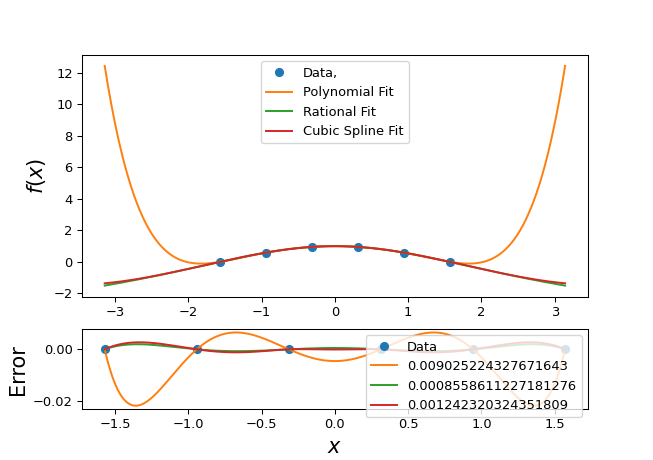

In [45]:
#doing all 3 fits for the cosine
n = 3
m = 4

n_pts = n+m-1

fun = np.cos

x = np.linspace(-np.pi/2, np.pi/2,n_pts)
y = fun(x)


xx = np.linspace(-np.pi,np.pi,1001)
yy_poly = poly_eval(x,y,n+m-1,xx)
yy_rat = rat_eval(x,y,n,m,xx)
yy_spline = cubspline_eval(x,y,xx)

ind1 = np.where(xx==-np.pi/2)[0][0]
ind2 = np.where(xx==np.pi/2)[0][0]

x_true = xx[ind1:ind2]
y_true = fun(x_true)
poly_resids = yy_poly[ind1:ind2]-y_true
rat_resids = yy_rat[ind1:ind2]-y_true
spline_resids = yy_spline[ind1:ind2]-y_true

poly_err = np.std(poly_resids)
rat_err = np.std(rat_resids)
spline_err = np.std(spline_resids)

fig, ax = plt.subplots(2,1, gridspec_kw={'height_ratios': [3, 1]})

ax[0].plot(x,y,'o')
ax[0].plot(xx,yy_poly)
ax[0].plot(xx,yy_rat)
ax[0].plot(xx,yy_spline)


ax[1].plot(x,[0]*len(x),'o')
ax[1].plot(x_true,poly_resids)
ax[1].plot(x_true,rat_resids)
ax[1].plot(x_true,spline_resids)

ax[0].set_ylabel('$f(x)$', fontsize = 16)
ax[1].set_xlabel('$x$', fontsize = 16)
ax[1].set_ylabel('Error', fontsize = 16)

ax[0].legend(['Data,','Polynomial Fit','Rational Fit','Cubic Spline Fit'])
ax[1].legend(['Data','{}'.format(poly_err),'{}'.format(rat_err),'{}'.format(spline_err)])

<font size="4"> We see that all three fits seem to be working okay, but the polynomial fit is the one that has the lowest error. (The number next to each line in the legend is the standard deviation of the residuals of the respective fit. This makes sense because $f(x) = cos(x)$ is really well described by a Taylor series. In some instances, when varying the number of points, the rational fit seems to outperform the polynomial (e.g., n = 8, m = 5), but generally the polynomial fit is the best. 
    
$ $

<ipython-input-46-06b77e8d8c15>:17: RankWarning: Polyfit may be poorly conditioned
  yy_poly = poly_eval(x,y,n+m-1,xx)


<IPython.core.display.Javascript object>


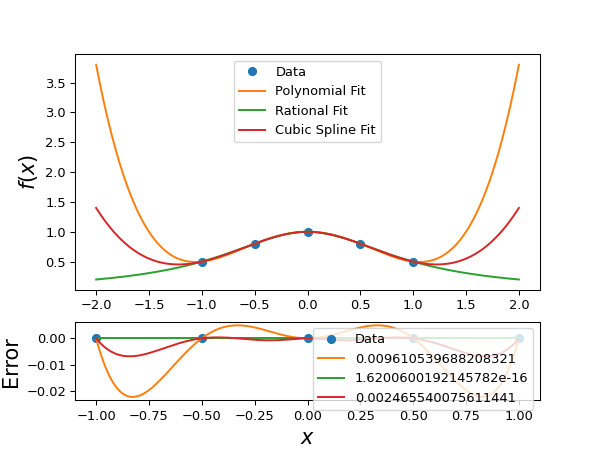

In [46]:
def lorentz(x):
    return 1/(x**2+1)


n = 3
m = 3

n_pts = n+m-1

fun = lorentz

x = np.linspace(-1, 1,n_pts)
y = fun(x)


xx = np.linspace(-2,2,1001)
yy_poly = poly_eval(x,y,n+m-1,xx)
yy_rat = rat_eval(x,y,n,m,xx)
yy_spline = cubspline_eval(x,y,xx)

ind1 = np.where(xx==-1)[0][0]
ind2 = np.where(xx==1)[0][0]

x_true = xx[ind1:ind2]
y_true = fun(x_true)
poly_resids = yy_poly[ind1:ind2]-y_true
rat_resids = yy_rat[ind1:ind2]-y_true
spline_resids = yy_spline[ind1:ind2]-y_true

poly_err = np.std(poly_resids)
rat_err = np.std(rat_resids)
spline_err = np.std(spline_resids)

fig, ax = plt.subplots(2,1, gridspec_kw={'height_ratios': [3, 1]})

ax[0].plot(x,y,'o')
ax[0].plot(xx,yy_poly)
ax[0].plot(xx,yy_rat)
ax[0].plot(xx,yy_spline)

ax[1].plot(x,[0]*len(x),'o')
ax[1].plot(x_true,poly_resids)
ax[1].plot(x_true,rat_resids)
ax[1].plot(x_true,spline_resids)

ax[0].set_ylabel('$f(x)$', fontsize = 16)
ax[1].set_xlabel('$x$', fontsize = 16)
ax[1].set_ylabel('Error', fontsize = 16)

ax[0].legend(['Data','Polynomial Fit','Rational Fit','Cubic Spline Fit'])
ax[1].legend(['Data','{}'.format(poly_err),'{}'.format(rat_err),'{}'.format(spline_err)])

<font size="4"> In the case of the lorentzian, we notice that the rational fit vastly outperforms all of the other ones. This makes sense, as the lorentzian itself is a rational function. If we print the coefficients of the polynomials, we see that within numerical error, the ratfit function returns the lorentzian. Hence, the error on the lorentzian fit is just the error of the machine $error \sim 10^{-16}$
    
$ $

<font size="4"> Now, if we put $n=4,m=5$

<IPython.core.display.Javascript object>


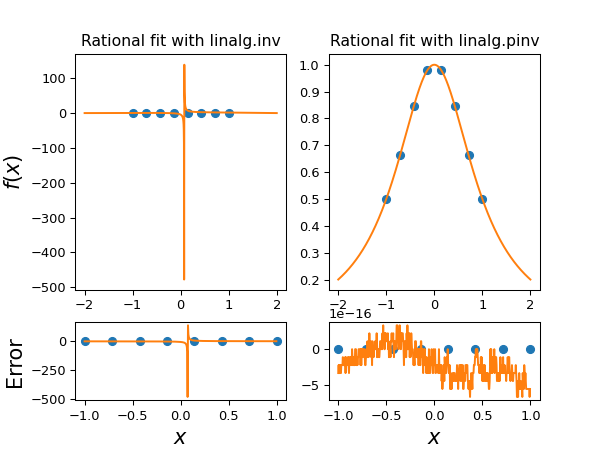

Text(0.5, 1.0, 'Rational fit with linalg.pinv')

In [48]:
n = 4
m = 5

n_pts = n+m-1

fun = lorentz

x = np.linspace(-1, 1,n_pts)
y = fun(x)


xx = np.linspace(-2,2,1001)
yy_rat = rat_eval(x,y,n,m,xx)
yy_rat2 = rat_eval2(x,y,n,m,xx)

ind1 = np.where(xx==-1)[0][0]
ind2 = np.where(xx==1)[0][0]

x_true = xx[ind1:ind2]
y_true = fun(x_true)
rat_resids = yy_rat[ind1:ind2]-y_true
rat_resids2 = yy_rat2[ind1:ind2]-y_true


rat_err = np.std(rat_resids)
rat_err2 = np.std(rat_resids2)


fig, ax = plt.subplots(2,2, gridspec_kw={'height_ratios': [3, 1]})

ax[0][0].plot(x,y,'o')
ax[0][1].plot(x,y,'o')
ax[0][0].plot(xx,yy_rat)
ax[0][1].plot(xx,yy_rat2)

ax[1][1].plot(x,[0]*len(x),'o')
ax[1][0].plot(x,[0]*len(x),'o')
ax[1][0].plot(x_true,rat_resids)
ax[1][1].plot(x_true,rat_resids2)

ax[0][0].set_ylabel('$f(x)$', fontsize = 16)
ax[1][0].set_xlabel('$x$', fontsize = 16)
ax[1][1].set_xlabel('$x$', fontsize = 16)
ax[1][0].set_ylabel('Error', fontsize = 16)

ax[0][0].set_title('Rational fit with linalg.inv')
ax[0][1].set_title('Rational fit with linalg.pinv')

<font size="4"> For this fit to work, we need at least a degree 2 polynomial in the denominator and a degree 1 polynomial in the numerator (to "replicate" the lorentzian). When giving too many degrees of freedom to the rational fit in the denominator and doing the matrix inversion with linalg.inv, the rational fit messes up. As soon as $m>3$ and that $n>1$, ($m=3$ corresponding to powers of $x$ up to $x^2$ in the denominator) the fit fails. This happens because adding "unnecessary" orders to the denominator is equivalent to writing the polynomial as $\frac{P(x)(1+ax)(1+bx)...\cdot(1+cx)}{(1+qq(x))(1+ax)(1+bx)...\cdot(1+cx)}$. The aforementioned conditions ($m>3$ and $n>1$) correspond to the cases of rational functions where there is at least one cancellation of $(1+\alpha x)$ factors. Because such a cancellation is true for any $\alpha$, the linalg.inv method has trouble inverting the matrix and generates very high values. If we look at the inverse of the matrices for linalg.inv, we see that a lot of entries result in values in the $10^{15}$ range. However, linalg.pinv, which deals with the singular value decomposition, and returns the right coefficients.